In [150]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [151]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
# data是原始数据集，data2是标准化后的原始数据集，data3是为了预测季后赛准备的数据集
data = pd.read_excel('test1.xlsx')
data2 = pd.read_excel('teststd.xlsx')
data3 = pd.read_excel('playoffs prediction data.xlsx')
# X是原始数据集，y是输赢情况的列向量
X = data[['命中数差','出手数差','命中率比','三分数差','三分出手差','三分命中率比','罚球命中差','罚球数差','罚球命中率比','进攻篮板差','总篮板差','助攻差','抢断差','盖帽差','失误差','犯规差','进攻效率','防守效率','回合数','有效命中率比','失误率比','进攻篮板率比','防守篮板率比','罚球数占比之比','主客场']]
y = data[['赢球结果']]
# X2是为了预测季后赛准备的数据集
X2 = data3[['命中数差','出手数差','命中率比','三分数差','三分出手差','三分命中率比','罚球命中差','罚球数差','罚球命中率比','进攻篮板差','总篮板差','助攻差','抢断差','盖帽差','失误差','犯规差','进攻效率','防守效率','回合数','有效命中率比','失误率比','进攻篮板率比','防守篮板率比','罚球数占比之比','主客场']]


# 显示一下原始数据集看看
X

,命中数差,出手数差,命中率比,三分数差,三分出手差,三分命中率比,罚球命中差,罚球数差,罚球命中率比,进攻篮板差,...,犯规差,进攻效率,防守效率,回合数,有效命中率比,失误率比,进攻篮板率比,防守篮板率比,罚球数占比之比,主客场
0,-5,-10,0.991507,6,13,1.098901,2,12,0.715278,-3,...,-7,109.6,111.7,95.8,1.081081,1.053571,0.725806,0.941040,1.250000,0
1,11,11,1.162791,8,6,1.597070,11,12,1.051768,9,...,-5,137.5,96.3,99.6,1.219713,0.775000,2.821429,1.421488,1.381743,1
2,-3,6,0.863558,0,12,0.693694,4,6,0.980609,7,...,-5,122.9,125.1,90.3,0.870821,0.741259,2.503759,1.299850,1.210526,0
3,-2,-12,1.095238,8,5,1.457726,0,5,0.856667,-6,...,-5,125.2,121.3,93.3,1.195446,1.376147,0.592715,0.850183,1.148276,0
4,-6,6,0.809717,3,15,1.000000,3,3,1.025840,3,...,1,102.3,107.9,98.2,0.846743,0.992187,1.224490,1.057895,1.051852,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2454,-7,-9,0.944551,3,5,1.064039,2,0,1.153740,-2,...,1,110.8,119.9,98.4,0.996650,1.669903,0.771429,0.953757,1.283784,0
2455,0,7,0.930018,-10,-15,0.877737,-2,-8,1.218430,-3,...,2,117.9,129.0,108.6,0.854790,0.523810,0.636704,0.883133,0.821622,1
2456,2,10,0.935547,-7,-2,0.494226,-15,-14,0.878857,0,...,3,111.6,129.0,103.9,0.867572,0.860294,0.811688,0.922667,0.510791,0
2457,-4,-14,1.056948,-8,-14,0.664577,22,25,1.344768,-2,...,-11,111.3,105.4,102.5,0.982524,1.029851,0.992565,0.997271,4.859155,1


In [152]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# 用PCA降维数据，防止过拟合
pca = PCA(n_components=25)
pca.fit(X)

# 将数据集转换为主成分
transformed_data = pca.transform(X)
transformed_data2 = pca.transform(X2)
# 计算各个主成分的方差占比
variance_ratio = pca.explained_variance_ratio_

variance_ratio

PCA(n_components=25)

array([2.28525250e-01, 1.89637919e-01, 1.67925396e-01, 1.30209088e-01,
       1.03586149e-01, 8.21558283e-02, 2.36636297e-02, 2.34446666e-02,
       1.35777776e-02, 1.20124817e-02, 7.88151564e-03, 6.62382802e-03,
       5.03849052e-03, 3.01660970e-03, 1.81162693e-03, 2.64321474e-04,
       1.88508070e-04, 1.73733369e-04, 1.52281637e-04, 6.66070648e-05,
       3.75733120e-05, 4.93848264e-06, 1.06969080e-06, 6.53214422e-07,
       5.71940724e-08])

Text(0.5, 0, 'Number of Components')

Text(0, 0.5, 'Cumulative Explained Variance')

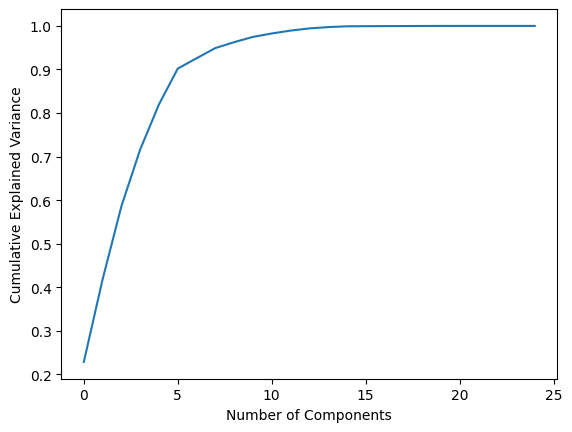

In [153]:
# 悬崖碎石图
plt.plot(np.cumsum(variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

plt.show()

In [154]:
new_data = transformed_data[:, :2]
new_data2 = transformed_data2[:, :2]
import pandas as pd
# 将处理后的数据集转换为Pandas DataFrame格式
new_data = pd.DataFrame(new_data, columns=['PC1', 'PC2'])
new_data2 = pd.DataFrame(new_data2, columns=['PC1', 'PC2'])

new_data

,PC1,PC2
0,-8.607509,0.493938
1,17.519192,38.574854
2,0.119878,5.002896
3,-2.985700,-0.686626
4,0.491177,-5.513319
...,...,...
2454,-8.124001,-6.291519
2455,-6.452315,-13.895971
2456,5.186828,-22.794387
2457,-32.207033,24.554553


In [155]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size=0.3)
# 创建神经网络模型
model = MLPClassifier(hidden_layer_sizes=(10,10), activation='relu', solver='adam')
model2 = RandomForestClassifier(n_estimators= 1000)
# 在训练集上训练模型
model.fit(X_train, y_train)
model2.fit(X_train,y_train)
# 预测测试集
y_pred = model.predict(X_test)
y_pred2 = model2.predict(X_test)


/Users/gongshukai/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(10, 10))

/var/folders/wz/4cyv558d01jb0_wb8_71vmz00000gn/T/ipykernel_62977/433197395.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(X_train,y_train)


RandomForestClassifier(n_estimators=1000)

In [156]:
prob = model.predict_proba(X_test)
prob2 = model2.predict_proba(X_test)

prob

array([[9.96239586e-01, 3.76041449e-03],
       [4.19581192e-01, 5.80418808e-01],
       [9.93696903e-01, 6.30309682e-03],
       ...,
       [9.99823108e-01, 1.76892466e-04],
       [1.78743951e-01, 8.21256049e-01],
       [8.89347455e-03, 9.91106525e-01]])

In [157]:
prob2

array([[1.   , 0.   ],
       [0.683, 0.317],
       [0.998, 0.002],
       ...,
       [0.999, 0.001],
       [0.105, 0.895],
       [0.   , 1.   ]])

In [158]:
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       368
           1       0.85      0.89      0.87       370

    accuracy                           0.86       738
   macro avg       0.87      0.86      0.86       738
weighted avg       0.87      0.86      0.86       738

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       368
           1       0.82      0.89      0.85       370

    accuracy                           0.85       738
   macro avg       0.85      0.85      0.85       738
weighted avg       0.85      0.85      0.85       738



Text(0.5, 0, 'False Winning Rate')

Text(0, 0.5, 'True Winning Rate')

Text(0.5, 1.0, 'ROC MLP Classifier')

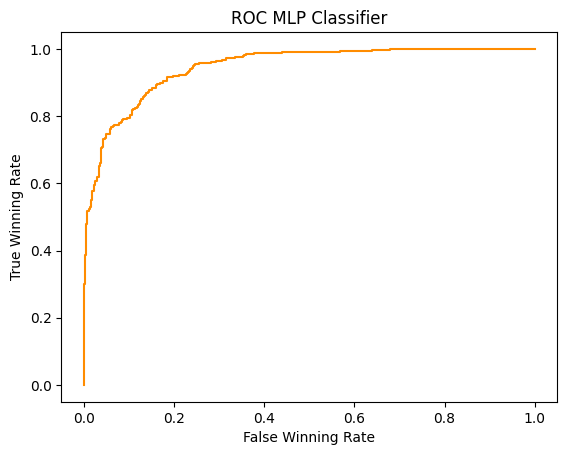

In [159]:
fpr, tpr, thresholds = roc_curve(y_test, prob[:,1])
roc_auc = auc(fpr, tpr)
fpr2, tpr2, thresholds2 = roc_curve(y_test, prob2[:,1])
roc_auc2 = auc(fpr2, tpr2)

plt.plot(fpr, tpr,color='darkorange')

plt.xlabel('False Winning Rate')
plt.ylabel('True Winning Rate')
plt.title('ROC MLP Classifier')

Text(0.5, 0, 'False Winning Rate')

Text(0, 0.5, 'True Winning Rate')

Text(0.5, 1.0, 'ROC Random Forest')

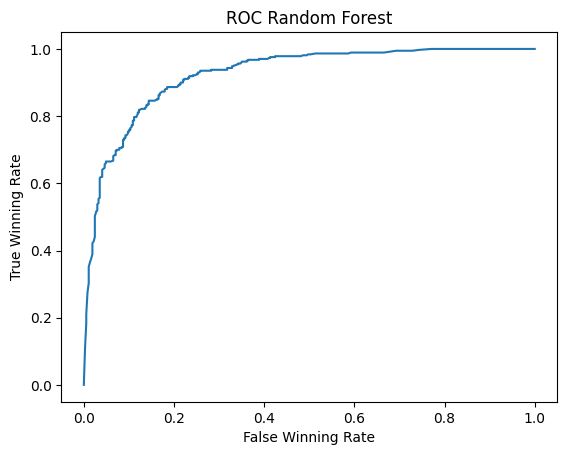

In [160]:
plt.plot(fpr2, tpr2)
plt.xlabel('False Winning Rate')
plt.ylabel('True Winning Rate')
plt.title('ROC Random Forest')

Text(0.5, 0, 'Specificity')

Text(0, 0.5, 'Sensitivity')

Text(0.5, 1.0, 'ROC of MLP & Random Forest')

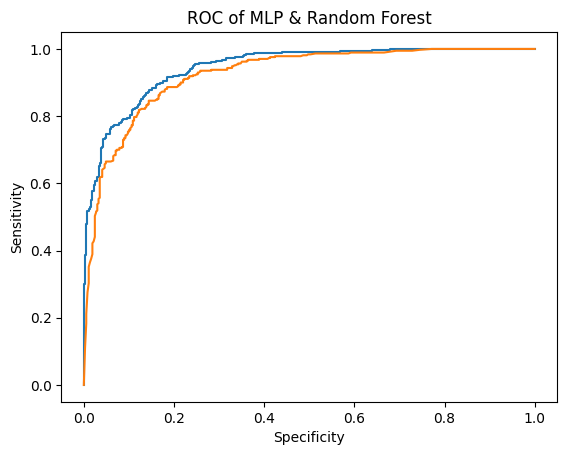

In [161]:
plt.plot(fpr,tpr,fpr2, tpr2)
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC of MLP & Random Forest')
plt.show()

In [162]:
playoff_prob = model.predict_proba(new_data2)
playoff_prob2 = model2.predict_proba(new_data2)

In [163]:
#由于playoff_prob里面有A vs B和B vs A，我们每两行取平均值作为预测的概率

def calculate(input):
    output=[]
    # 按顺序将每两个向量为一组，并计算平均值
    for i in range(0, len(input), 2):
        vector1 = input[i]
        vector2 = input[i+1]
        average = (vector1[0] + vector2[1]) / 2
        output.append([average,1-average])
    return output

In [164]:
playoff_prob


array([[0.54205903, 0.45794097],
       [0.27422321, 0.72577679],
       [0.25043735, 0.74956265],
       [0.36314149, 0.63685851],
       [0.19637704, 0.80362296],
       [0.56191377, 0.43808623],
       [0.38840568, 0.61159432],
       [0.55954731, 0.44045269],
       [0.24301125, 0.75698875],
       [0.41115678, 0.58884322],
       [0.68896563, 0.31103437],
       [0.06401281, 0.93598719],
       [0.0130995 , 0.9869005 ],
       [0.97666431, 0.02333569],
       [0.18586386, 0.81413614],
       [0.6741926 , 0.3258074 ],
       [0.48450344, 0.51549656],
       [0.26021812, 0.73978188],
       [0.50844966, 0.49155034],
       [0.24335069, 0.75664931],
       [0.46597696, 0.53402304],
       [0.06318684, 0.93681316],
       [0.94277501, 0.05722499],
       [0.03242581, 0.96757419],
       [0.30079289, 0.69920711],
       [0.45499252, 0.54500748],
       [0.02085002, 0.97914998],
       [0.95315037, 0.04684963],
       [0.06956056, 0.93043944],
       [0.93310518, 0.06689482],
       [0.

In [165]:
playoff_prob2

array([[0.415, 0.585],
       [0.392, 0.608],
       [0.61 , 0.39 ],
       [0.165, 0.835],
       [0.303, 0.697],
       [0.806, 0.194],
       [0.193, 0.807],
       [0.556, 0.444],
       [0.403, 0.597],
       [0.867, 0.133],
       [0.625, 0.375],
       [0.006, 0.994],
       [0.005, 0.995],
       [0.976, 0.024],
       [0.161, 0.839],
       [0.418, 0.582],
       [0.343, 0.657],
       [0.412, 0.588],
       [0.494, 0.506],
       [0.415, 0.585],
       [0.454, 0.546],
       [0.207, 0.793],
       [0.996, 0.004],
       [0.01 , 0.99 ],
       [0.462, 0.538],
       [0.323, 0.677],
       [0.008, 0.992],
       [0.982, 0.018],
       [0.013, 0.987],
       [0.994, 0.006],
       [0.148, 0.852],
       [0.089, 0.911],
       [0.494, 0.506],
       [0.415, 0.585],
       [0.088, 0.912],
       [0.812, 0.188],
       [0.207, 0.793],
       [0.454, 0.546],
       [0.909, 0.091],
       [0.077, 0.923],
       [0.124, 0.876],
       [0.436, 0.564],
       [0.546, 0.454],
       [0.4

In [166]:
calculate(playoff_prob)
calculate(playoff_prob2)
#注意：左输右赢

[[0.6339179093233638, 0.3660820906766362],
 [0.4436479340689778, 0.5563520659310222],
 [0.3172316316408575, 0.6827683683591426],
 [0.41442918161282877, 0.5855708183871713],
 [0.4159272318742294, 0.5840727681257706],
 [0.812476411969282, 0.187523588030718],
 [0.01821759466096908, 0.9817824053390309],
 [0.2558356290924986, 0.7441643709075014],
 [0.6121426602550165, 0.3878573397449835],
 [0.6325494829781245, 0.3674505170218755],
 [0.7013950608006152, 0.2986049391993848],
 [0.9551745998918826, 0.04482540010811742],
 [0.42290018353813286, 0.5770998164618671],
 [0.03384982653990841, 0.9661501734600916],
 [0.06822769006945831, 0.9317723099305417],
 [0.5960787680897133, 0.4039212319102867],
 [0.6325494829781245, 0.3674505170218755],
 [0.2959185384599032, 0.7040814615400968],
 [0.2986049391993848, 0.7013950608006152],
 [0.6877441261039601, 0.3122558738960399],
 [0.42936133117793707, 0.5706386688220629],
 [0.3806718114607993, 0.6193281885392007]]

[[0.5115, 0.48850000000000005],
 [0.7224999999999999, 0.2775000000000001],
 [0.2485, 0.7515000000000001],
 [0.3185, 0.6815],
 [0.268, 0.732],
 [0.8095, 0.1905],
 [0.0145, 0.9855],
 [0.3715, 0.6285000000000001],
 [0.4655, 0.5345],
 [0.5395, 0.4605],
 [0.6235, 0.37649999999999995],
 [0.993, 0.007000000000000006],
 [0.5695, 0.4305],
 [0.013, 0.987],
 [0.0095, 0.9905],
 [0.5295, 0.47050000000000003],
 [0.5395, 0.4605],
 [0.138, 0.862],
 [0.3765, 0.6234999999999999],
 [0.916, 0.08399999999999996],
 [0.344, 0.656],
 [0.5525, 0.4475]]